#### Standard Imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd#### Standard Imports

In [2]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

#### Cell Width Increase

In [4]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:60% !important; }</style>"))

In [5]:
gapminder = pd.read_csv('gapminder.csv')

In [6]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


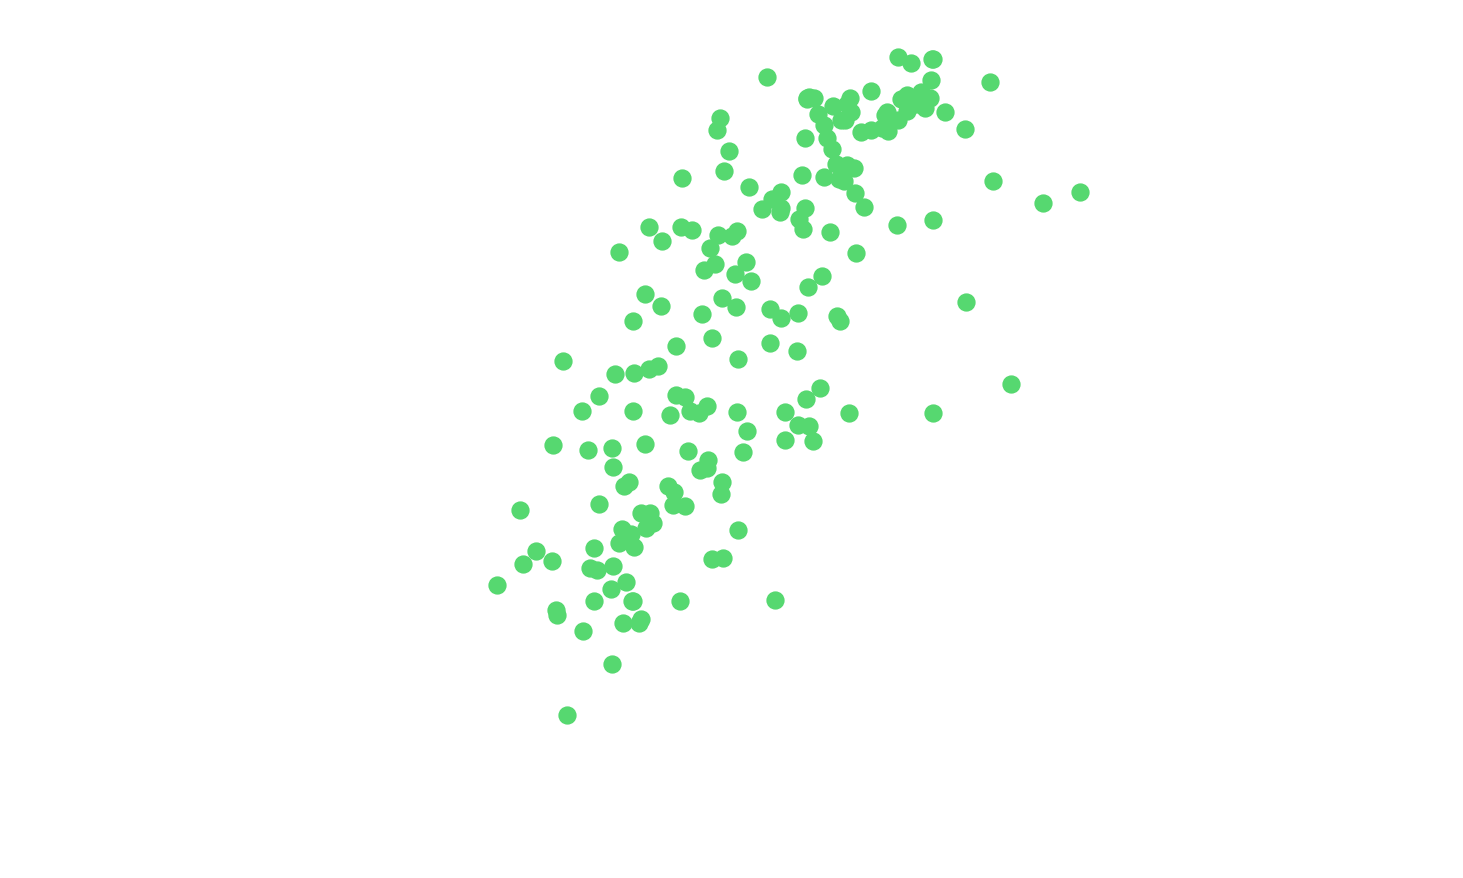

In [7]:
plotyear(1965)

In [18]:
# Change size of data points based on population quantity
def plotyear(year):
    data = gapminder[gapminder.year == year]
    
    area = 5e-6 * data.population
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True,
                     s=area)

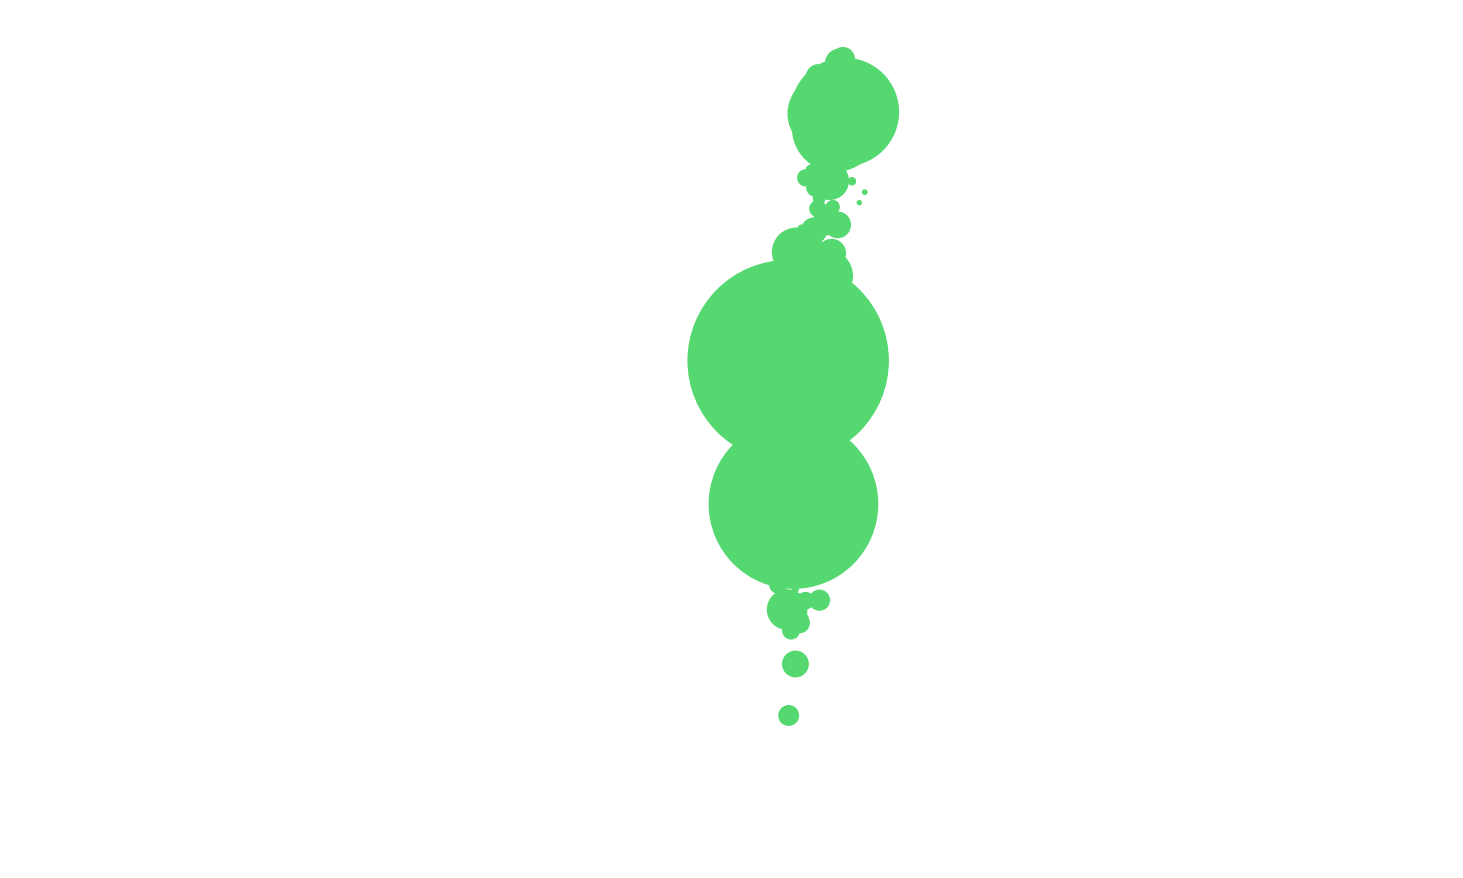

In [19]:
plotyear(1965);

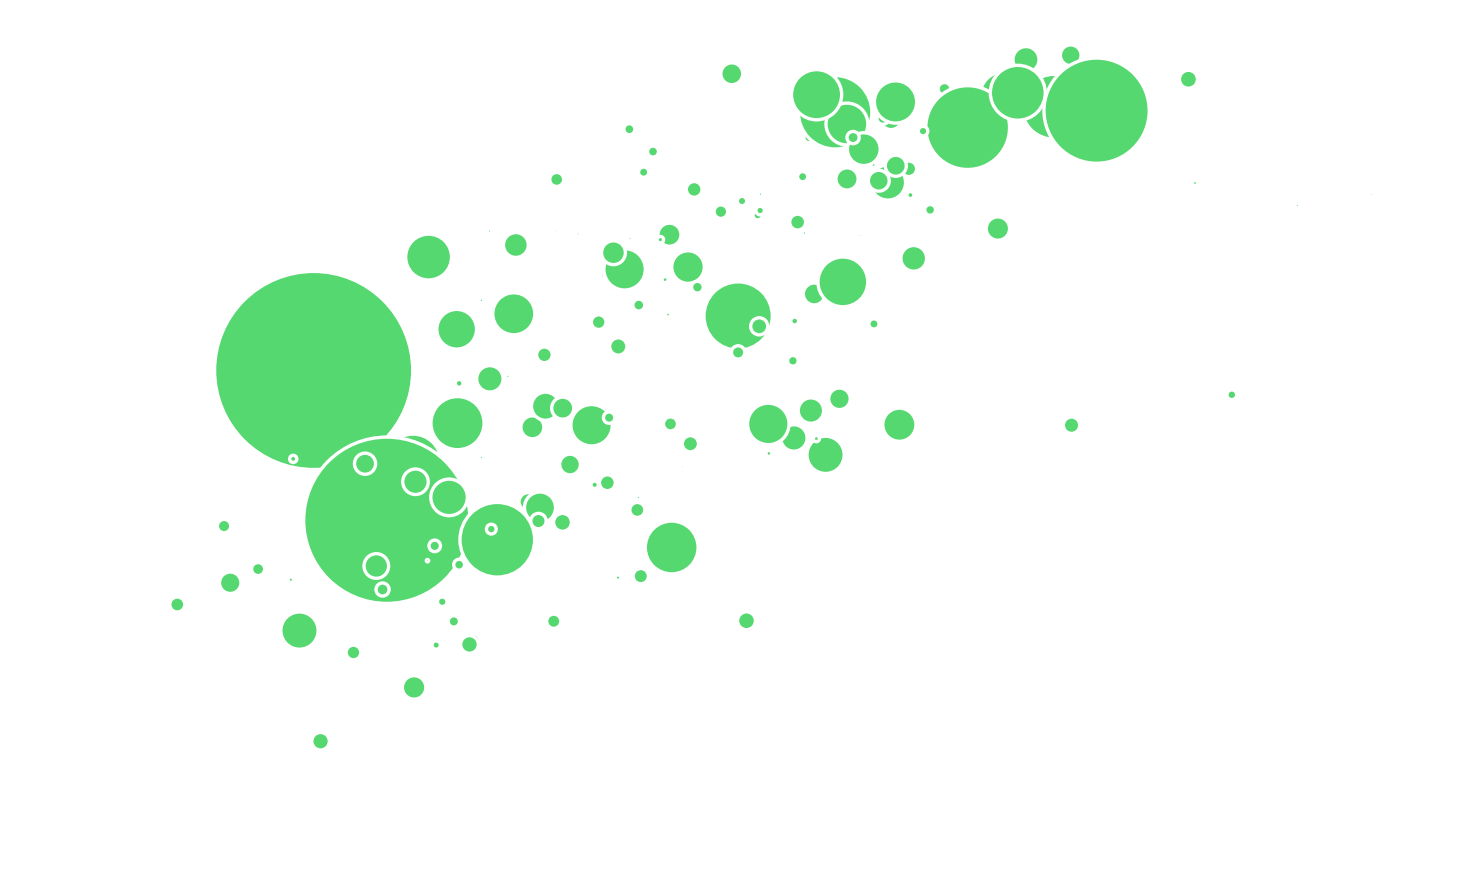

In [27]:
# Add definition to data points with linewidths and edgecolors
def plotyear(year):
    data = gapminder[gapminder.year == year]
    
    area = 5e-6 * data.population
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True,
                     s=area,
                     linewidths=1,
                     edgecolors='w')
""" Code for shrinking the x-axis """
    plt.axis(xmin = 1, xmax = 250, ymin = 30, ymax = 75)
    
plotyear(1965)

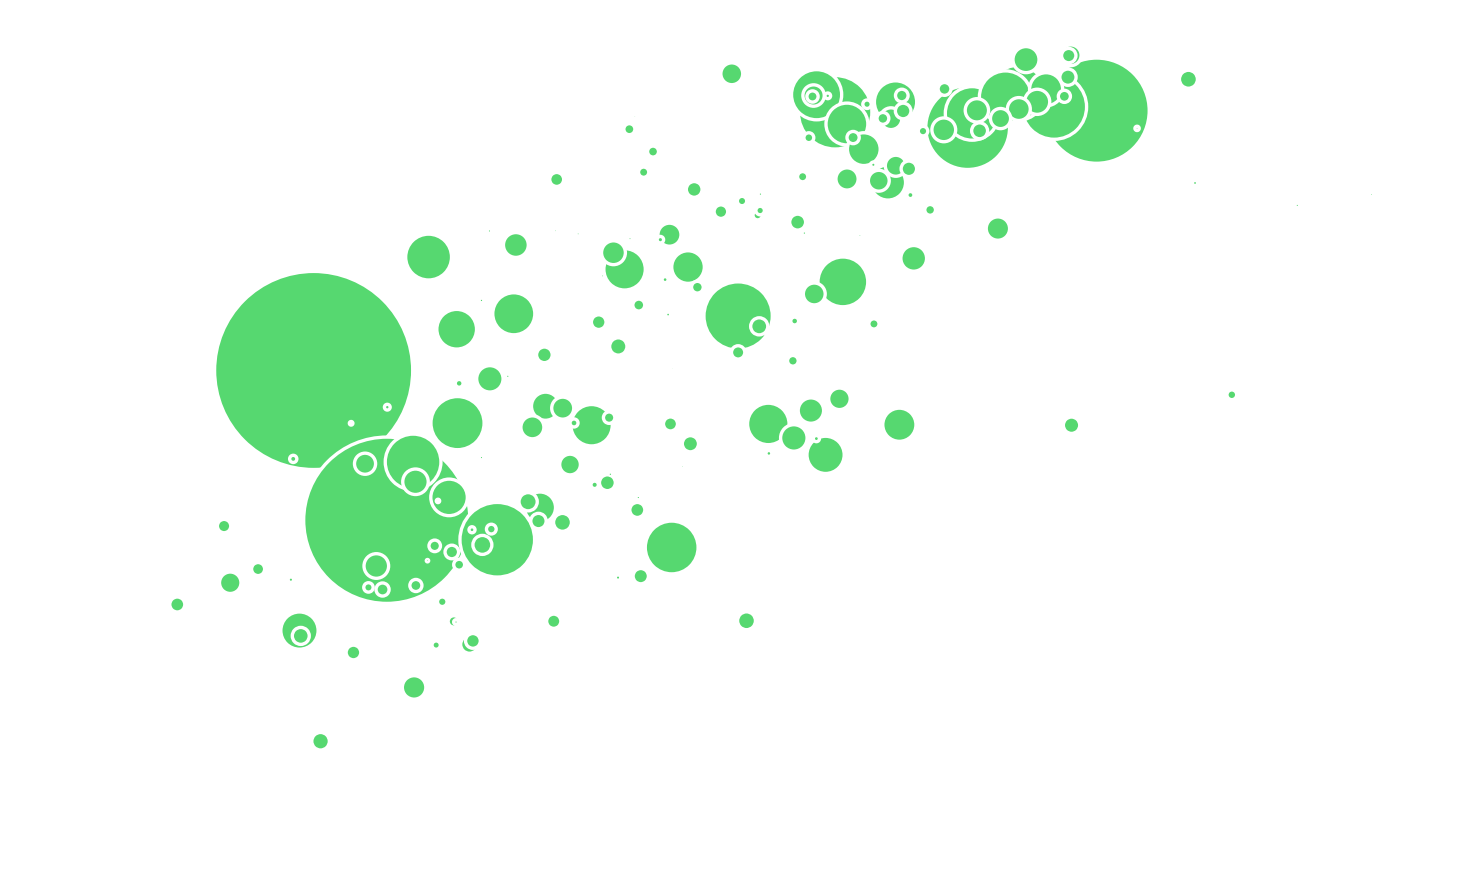

In [36]:
# Sort data points by population so larger data points sit in the back
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    
    area = 5e-6 * data.population
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True,
                     s=area,
                     linewidths=1,
                     edgecolors='w')
    # Code for shrinking the x-axis
    plt.axis(xmin = 1, xmax = 250, ymin = 30, ymax = 75)
    
plotyear(1965)

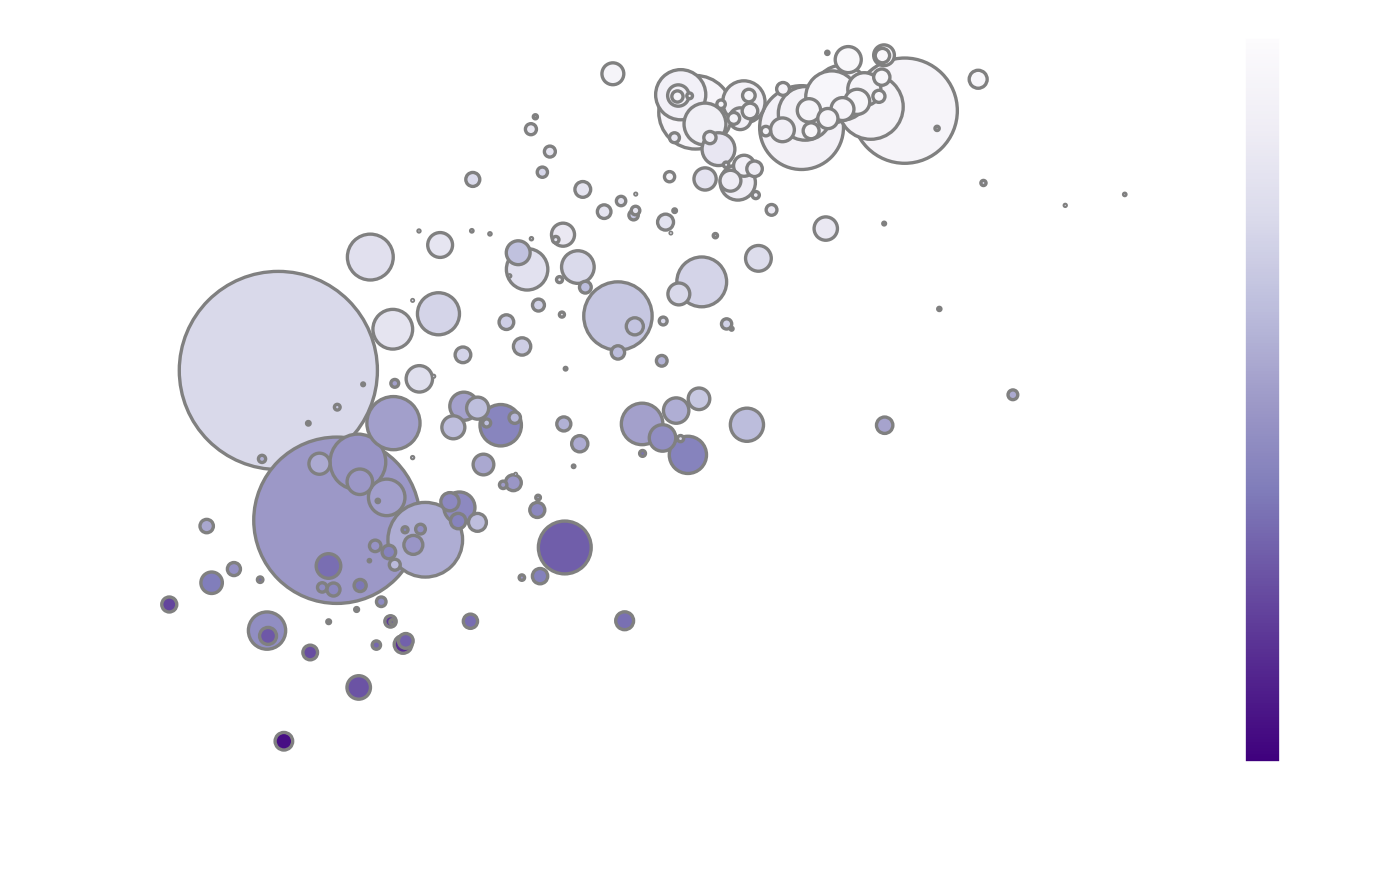

In [39]:
# Use color as an additional dimension
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True,
                     s=area, c=color,
                     linewidths=1,
                     edgecolors='grey',
                     # Use r on Purples_r to inverse purple gradient
                     colormap=matplotlib.cm.get_cmap('Purples_r'),
                     vmin=55, vmax=100,
                     # Unhide x-axis label
                     sharex=False)
    # Code for shrinking the x-axis
    plt.axis(xmin = 1, xmax = 250, ymin = 30, ymax = 75)
    
plotyear(1965)

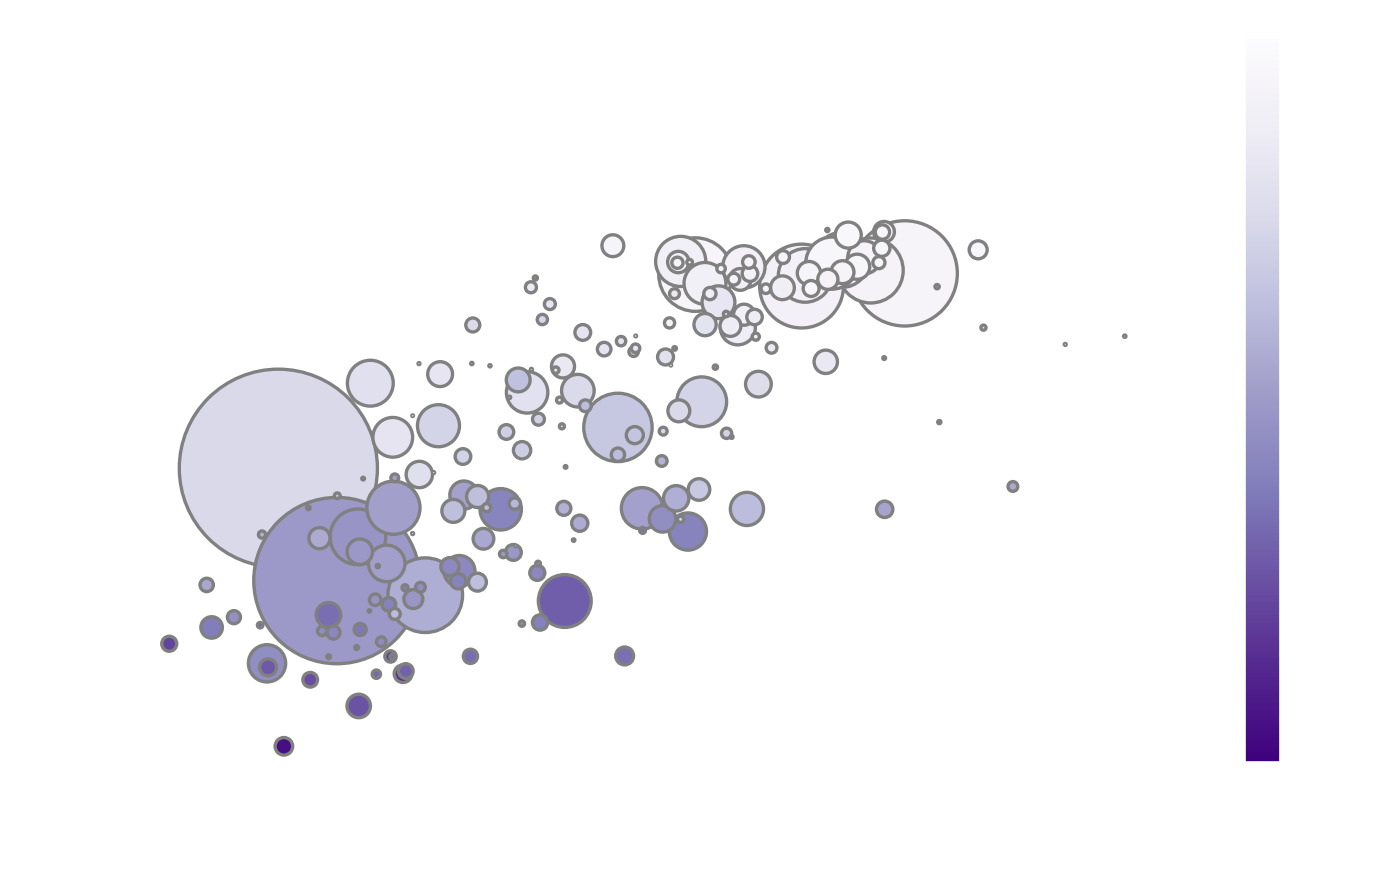

In [45]:
# Set edgecolor to represent dat pouints regions
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue', 
                                 'Europe': 'gold', 
                                 'America': 'palegreen', 
                                 'Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True,
                     s=area, c=color,
                     linewidths=1,
                     edgecolors='grey',
                     # Use r on Purples_r to inverse purple gradient
                     colormap=matplotlib.cm.get_cmap('Purples_r'),
                     vmin=55, vmax=100,
                     # Unhide x-axis label
                     sharex=False)
    
    pp.axis(xmin = 1, xmax = 250, ymin = 30, ymax = 90)
    
plotyear(1965) 

In [44]:
""" Animate plot with a simpler (than slider at beginning of this Chapter) selector"""
interact(plotyear, year = range(1965, 2016, 10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [52]:
world_population = gapminder[gapminder.year == 2015].population.sum()

In [53]:
print(int(world_population))

7292414176


In [54]:
world_population_commas = "{:,}".format(int(world_population))

In [55]:
world_population

7292414176.0

In [56]:
world_population_commas

'7,292,414,176'

In [58]:
# Divide population results by geographical regions
pop_by_regions = gapminder[gapminder.year == 2015].groupby('region').population.sum()

In [59]:
pop_by_regions

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

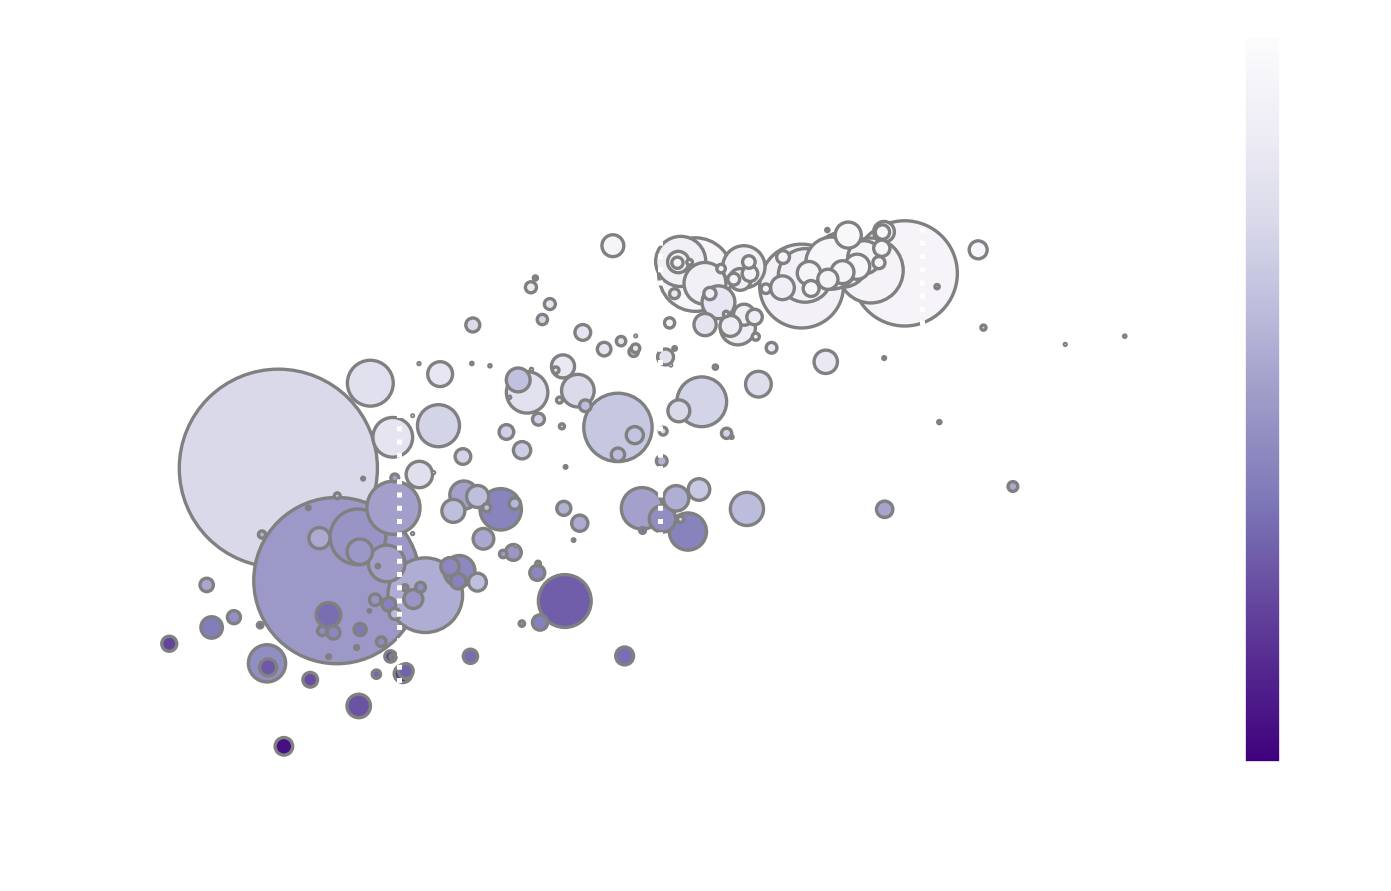

In [63]:
# Show income bands
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue', 
                                 'Europe': 'gold', 
                                 'America': 'palegreen', 
                                 'Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True,
                     s=area, c=color,
                     linewidths=1,
                     edgecolors='grey',
                     # Use r on Purples_r to inverse purple gradient
                     colormap=matplotlib.cm.get_cmap('Purples_r'),
                     vmin=55, vmax=100,
                     # Unhide x-axis label
                     sharex=False)
    
    for level in [4, 16, 64]:
        pp.axvline(level, linestyle = ':', color = 'w')
    
    pp.axis(xmin = 1, xmax = 250, ymin = 30, ymax = 90)
    
plotyear(1965) 

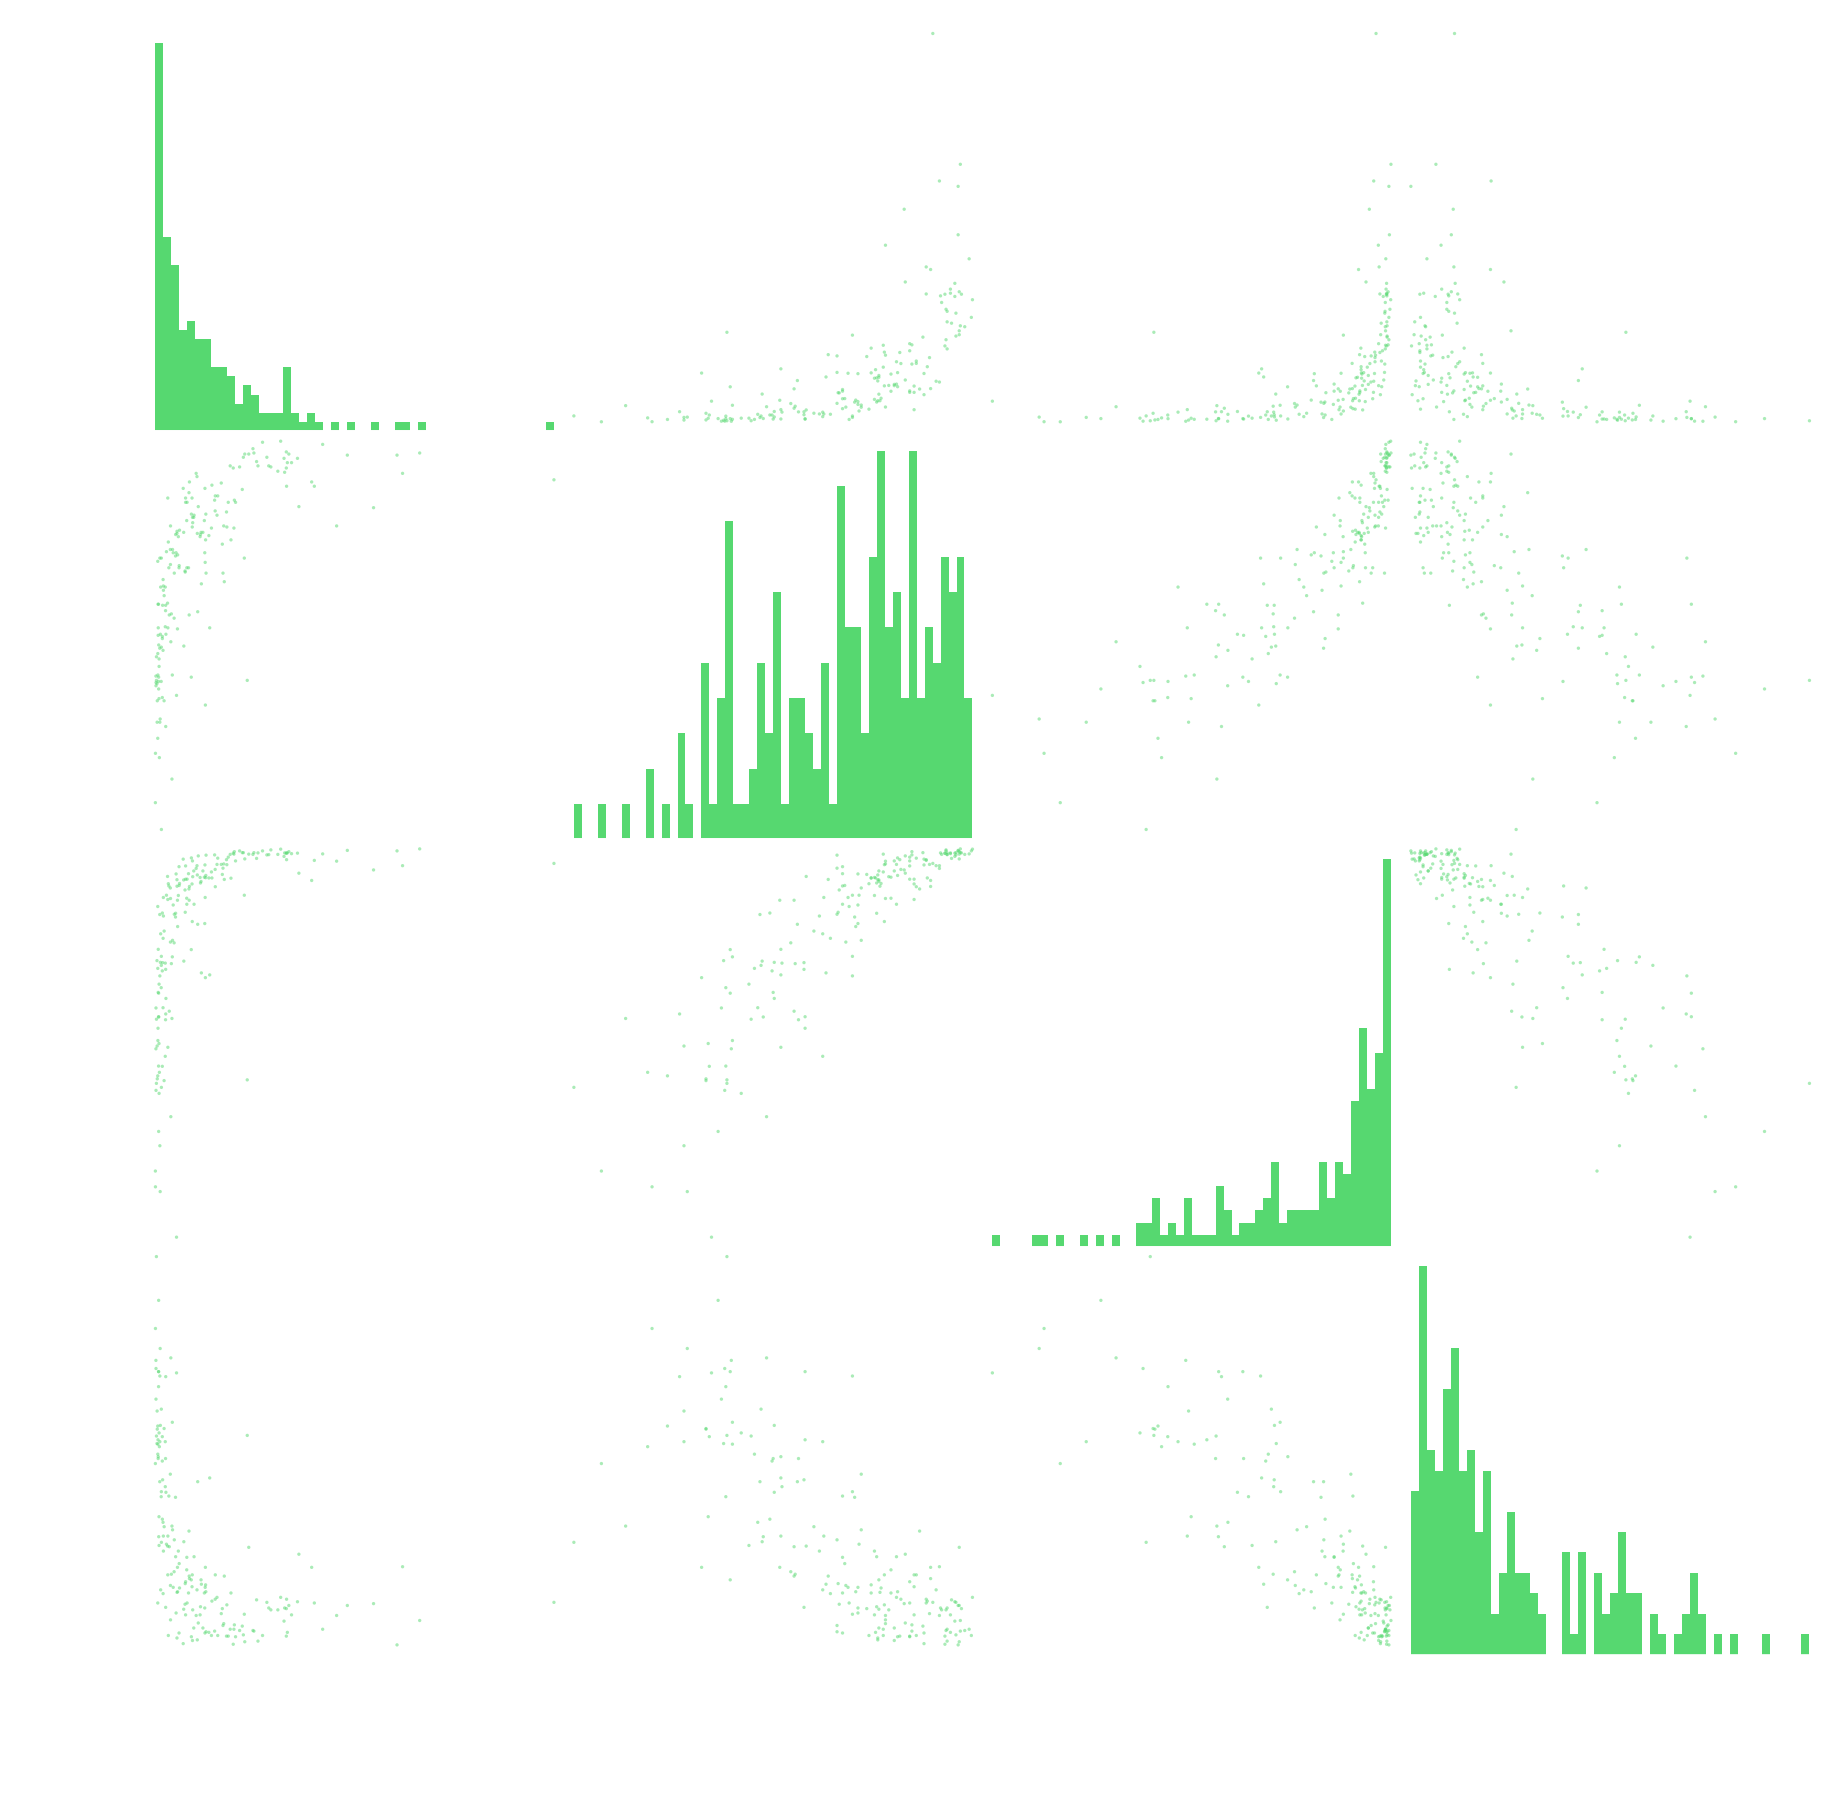

In [66]:
data = gapminder.loc[gapminder.year == 2015, ['gdp_per_day', 
                                              'life_expectancy', 
                                              'age5_surviving', 
                                              'babies_per_woman']]
pd.plotting.scatter_matrix(data, figsize = (9, 9));